In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import wquantiles as wq

In [25]:
import statsmodels.api as stm

### 1. Estimates of location

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv")
df.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [5]:
print("Mean Population: ", df['Population'].mean())
print("Trimmed Mean Population: ", st.trim_mean(df['Population'], 0.10))
print("Median Population: ", df['Population'].median())
print("\nWeighted(Murder.Rate) Mean Population: ", np.average(df['Murder.Rate'], weights=df['Population']))
print("Weighted(Murder.Rate) Median Population: ", wq.median(df['Murder.Rate'], weights=df['Population']))

Mean Population:  6162876.3
Trimmed Mean Population:  4783697.125
Median Population:  4436369.5

Weighted(Murder.Rate) Mean Population:  4.445833981123393
Weighted(Murder.Rate) Median Population:  4.4


### 2. Estimates of Variablity

In [27]:
print("Std. Deviation: ", df['Population'].std())
print("IQR: ", (df['Population'].quantile(0.75)- df['Population'].quantile(0.25)))
print("Median Absolute Deviation from Median: ", stm.robust.scale.mad(df['Population']))

df['Population'].quantile([0.25, 0.5, 0.75])

Std. Deviation:  6848235.347401142
IQR:  4847308.0
Median Absolute Deviation from Median:  3849876.1459979336


0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

Text(0, 0.5, 'Population (Millions)')

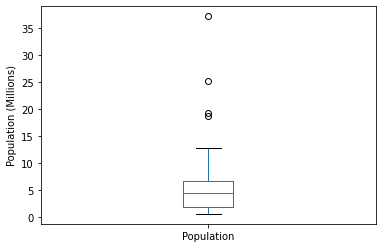

In [28]:
ax = (df['Population'] / 1_000_000).plot.box()
ax.set_ylabel("Population (Millions)")